In [1]:
# Dependencies
import tweepy
import json
import time
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User Account
target_user = ("@BBCNews", "@CNN", "@CBS","@FOXNEWS","@nytimes")

# set counter
counter = 1

# List
senti_results_list = []

# Loop through each user
for user in target_user:

    # Loop through 10 pages of tweets (total 100 tweets)
 
        public_tweets = api.user_timeline(user, count =100)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            polarity = analyzer.polarity_scores(tweet["text"])
            compound = polarity["compound"]
            pos = polarity["pos"]
            neu = polarity["neu"]
            neg = polarity["neg"]
            tweets_ago = counter

# Add into list each tweet
            senti_results_list.append({"Airline_user": user,
                                         "Date":tweet["created_at"],
                                         "compound": compound,
                                         "Positive": pos,
                                         "Negative": neg,
                                         "Neutral": neg,
                                         "Tweets Ago": counter,
                                         "Tweet Text": tweet['text']
                                         })
# increase counter
            counter += 1
    

In [6]:
senti_results_list_df = pd.DataFrame.from_dict(senti_results_list)
senti_results_list_df

,Airline_user,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,compound
0,@BBCNews,Mon Jul 09 02:28:18 +0000 2018,0.209,0.209,0.182,Maedeh Hojabri: Iran women dance in support of...,1,-0.1027
1,@BBCNews,Mon Jul 09 02:10:46 +0000 2018,0.000,0.000,0.000,"Government outsourcing approach flawed, say MP...",2,0.0000
2,@BBCNews,Mon Jul 09 01:23:33 +0000 2018,0.000,0.000,0.000,How Trump's UK visit will be different to thos...,3,0.0000
3,@BBCNews,Mon Jul 09 01:21:11 +0000 2018,0.000,0.000,0.263,The polio survivor who became a healthcare bos...,4,0.3612
4,@BBCNews,Mon Jul 09 01:10:54 +0000 2018,0.000,0.000,0.000,Chris Moore: The man who's photographed 60 yea...,5,0.0000
5,@BBCNews,Mon Jul 09 00:43:28 +0000 2018,0.000,0.000,0.000,Prince Louis's christening to take place in th...,6,0.0000
6,@BBCNews,Mon Jul 09 00:18:07 +0000 2018,0.000,0.000,0.248,Thai cave rescue: Remaining boys wait for oper...,7,0.5106
7,@BBCNews,Sun Jul 08 22:55:01 +0000 2018,0.315,0.315,0.000,Brexit Secretary David Davis resigns https://t...,8,-0.3182
8,@BBCNews,Sun Jul 08 22:37:37 +0000 2018,0.000,0.000,0.268,Newspaper headlines: Novichok mum dies and Tha...,9,0.5106
9,@BBCNews,Sun Jul 08 22:00:38 +0000 2018,0.000,0.000,0.156,"Wimbledon 2018: Roger Federer, Serena Williams...",10,0.3400


In [ ]:
# Create DataFrame from Results List
#results_df = pd.DataFrame(results_list).set_index("Airline").round(3)
# results_df

In [ ]:
senti_results_list_df.to_csv("Tweet.csv", index=False, header=True)

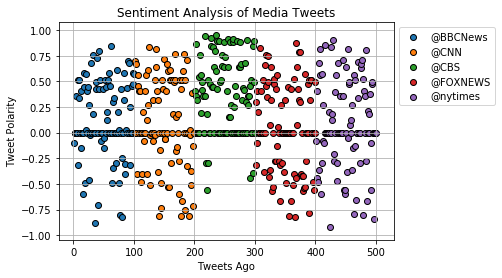

In [8]:
# Create plot
#plot scatterplot using a for loop.
for user in target_user:
    plot_data = senti_results_list_df.loc[senti_results_list_df["Airline_user"] == user]
    plt.scatter(plot_data["Tweets Ago"],plot_data["compound"],label = user, 
               alpha=1.0, edgecolors='black')
    
#Add legend
plt.legend(bbox_to_anchor=(1, 1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("TweetPlot1.png")
plt.show()

In [9]:
plt.savefig("Tweetplot.png")

In [11]:
avg_senti = senti_results_list_df.groupby("Airline_user")["compound"].mean()

Airline_user
@BBCNews    0.123894
@CBS        0.363259
@CNN        0.085868
@FOXNEWS    0.042866
@nytimes    0.079478
Name: compound, dtype: float64

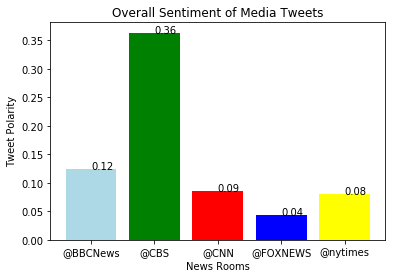

In [12]:
x_axis = np.arange(len(avg_senti))
xlabels = avg_senti.index
count = 0
for score in avg_senti:
    if score < 0:
        height = score - .01
    else:
        height = score + .01
    plt.text(count, score, str(round(score,2)))
    count = count + 1
plt.bar(x_axis, avg_senti, tick_label = xlabels, color = ['lightblue', 'green', 'red', 'blue', 'yellow'])
#Set title, x axis label, and y axis label.
plt.title("Overall Sentiment of Media Tweets")
plt.xlabel("News Rooms")
plt.ylabel("Tweet Polarity")
plt.savefig("Bar plot of news tweets.png")
plt.show()